# MODEL SELECTION

# 1) Ridge Regression

# $RSS + \alpha \sum_{j=1}^{d}\hat{\beta }_{j}^{2}$

<b>By adding a new term to the RSS term in Ridge Regression, it aims to reduce the coefficients of the variables that do not contribute to the correlation. While determining the coefficients in the Ridge regression, the above term is tried to be minimized instead of RSS.</b>

<b>You can think of the alpha in front of the total as a correction coefficient. This coefficient is determined by the user. With the help of this term, the beta coefficients are reduced. If the alpha value to be used is equal to zero, the result will be the same as the sum of the smallest squares. On the other hand, as the alpha value gets larger, the beta coefficients approach zero. For this reason, the selection of the alpha value that will give the best result is very important. For the alpha value that will give the most successful result, cross validation methods can be used.</b>

<b>Ridge() function from the sklearn.linear_model module is used for Ridge regression in Python. In this function, we specify the value of $\alpha $ with alpha argument. Also, by using the normalize=True argument, it is ensured that all variables are normalized and brought to the same scale.</b>

In [19]:
import warnings as wrn
wrn.filterwarnings('ignore')

import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [20]:
bostondf = pd.read_csv('Boston.csv')

X = bostondf.drop('medv',axis=1)
y = bostondf['medv']

In [21]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X,y)
ridge_model.score(X,y)

0.7406002922228037

In [22]:
ridge_model.intercept_

35.69365371165917

In [23]:
ridge_model.coef_

array([-1.07473720e-01,  4.65716366e-02,  1.59989982e-02,  2.67001859e+00,
       -1.66846452e+01,  3.81823322e+00, -2.69060598e-04, -1.45962557e+00,
        3.03515266e-01, -1.24205910e-02, -9.40758541e-01,  9.36807461e-03,
       -5.25966203e-01])

<b>Let's write a code that will do cross validation for different alpha values. First, let's create a logarithmic array from -4 to 0.1 (np.logspace(-4,0.1,100)). We use these values as alpha values in the for loop we created. For each alpha value We perform a 5-fold cross validation and record the average of the generated $R_{2}$ values (the cross_val_score function calculates the $R_{2}$ values), and then we select the alpha value that gives the highest $R_{2}$ value.</b>

In [24]:
alpha_values = np.logspace(-4,0.1,100)

ridge_R2 = []

ridge_model = Ridge()

for alpha in alpha_values:
    ridge_model.alpha = alpha
    ridge_cv = cross_val_score(ridge_model,X,y,cv=5)
    ridge_R2.append(np.mean(ridge_cv))

ind = ridge_R2.index(max(ridge_R2))
ind

99

In [25]:
alpha_values[ind]

1.2589254117941673

<b>Let's see our results in a graph with alpha value and $R^{2}$ values.</b>

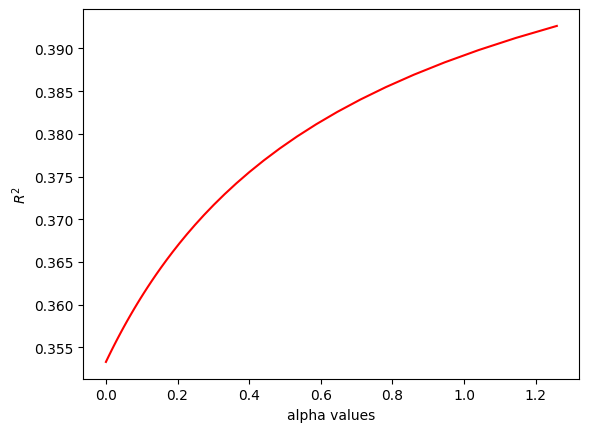

In [26]:
plt.plot(alpha_values,ridge_R2,'r-')
plt.xlabel('alpha values')
plt.ylabel('$R^{2}$')

plt.show()

# 2) Lasso Regression

<b>Lasso regression is also similar to Ridge regression. The aim is to reduce the coefficients of variables that have little contribution to the model. The advantage of Lasso regression over Ridge regression is that it produces coefficients equal to zero, allowing the removal of unnecessary variables.</b>



# $RSS + \alpha \sum_{j=1}^{d}\left|\hat{\beta _{j}} \right|$

In [27]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X,y)
lasso_model.score(X,y)

0.7269834862602695

In [28]:
lasso_model.intercept_

25.57707317966212

In [29]:
lasso_model.coef_

array([-0.09789363,  0.04921111, -0.03661906,  0.95519003, -0.        ,
        3.70320175, -0.01003698, -1.16053834,  0.27470721, -0.01457017,
       -0.77065434,  0.01024917, -0.56876914])

<b>When we examine the coefficients produced by the Ridge and Lasso regressions, we see that the coefficients of the unimportant variables for the model are calculated as very small values in the Ridge regression, while the coefficients exactly equal to zero are produced for these variables in Lasso.</b>